In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
from numpy import var


In [0]:
bvsp = pd.read_excel('bvsoexcel.xlsx')
#,  delimiter = ',',encoding = "utf-8")

In [0]:
ventas = pd.read_excel('ventas.xlsx')

In [0]:
#bovespa['RetGap']   = np.log(bovespa.Close/bovespa.Close.shift(1)).fillna(0)
#bovespa['RetIntra'] = np.log(bovespa.Close/bovespa.Open).fillna(0)
bvsp['Var'] = bvsp['Adj Close'].pct_change()
ventas['Var'] = ventas['payment_value'].pct_change()
#bovespa['Volat']    = bovespa['Var'].rolling(250).std()*100*(250)**0.5

In [0]:
bvsp.head()

,Date,Adj Close,Var
0,2017,64954,NaN
1,2017,66125,0.018028
2,2017,67748,0.024544
3,2017,66662,-0.016030
4,2017,66786,0.001860


In [0]:
ventas.head(5)

,years,payment_value,Var
0,2017,83736.76,NaN
1,2017,91402.10,0.091541
2,2017,66410.81,-0.273421
3,2017,56148.68,-0.154525
4,2017,89966.36,0.602288


In [0]:
df = pd.merge(bvsp, ventas, left_index=True, right_index=True)

In [0]:
df.head(2)

,Date,Adj Close,Var_x,years,payment_value,Var_y
0,2017,64954,NaN,2017,83736.76,NaN
1,2017,66125,0.018028,2017,91402.10,0.091541


In [0]:
bvsp_var = var(bvsp['Var'])
bvsp_var

Out[70]: 0.0006607800122723829

In [0]:
ventas_var = var(ventas['Var'])
ventas_var

Out[71]: 0.0630018512145328

In [0]:
df.cov()

,Date,Adj Close,Var_x,years,payment_value,Var_y
Date,0.245709,3.003315e+03,-0.000834,0.245709,2.619793e+04,-0.001353
Adj Close,3003.314664,6.105511e+07,18.626675,3003.314664,4.608670e+08,9.760930
Var_x,-0.000834,1.862668e+01,0.000669,-0.000834,-1.381127e+02,0.000720
years,0.245709,3.003315e+03,-0.000834,0.245709,2.619793e+04,-0.001353
payment_value,26197.926046,4.608670e+08,-138.112655,26197.926046,6.390920e+09,6153.454576
Var_y,-0.001353,9.760930e+00,0.000720,-0.001353,6.153455e+03,0.063789


In [0]:
covarianza = 0.000720

In [0]:
beta = covarianza/bvsp_var
print(beta)

1.0896213363415204


In [0]:
x.dropna(inplace=True)
y.dropna(inplace=True)

In [0]:
a, b = np.polyfit(x,y,1)

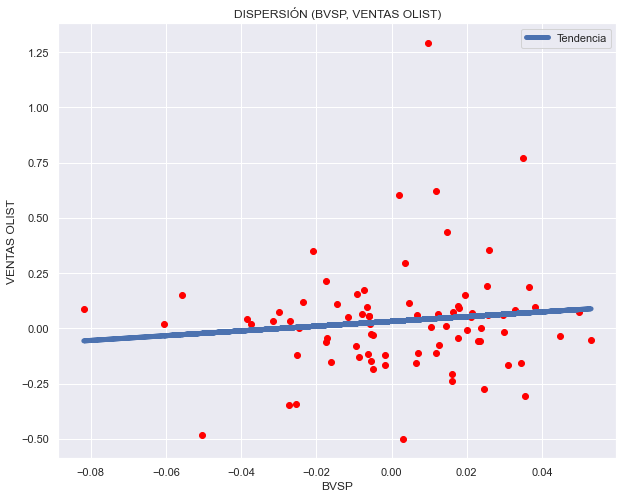

In [0]:
sns.set()
plt.figure(figsize = (10,8))
x = bvsp['Var']
y = ventas[ 'Var']
# Ploteamos
plt.scatter(x, y,  color='red')
plt.plot(x,a*x+b, linewidth=5.0, label = 'Tendencia')
plt.title('DISPERSIÓN (BVSP, VENTAS OLIST)')
plt.xlabel('BVSP')
plt.ylabel("VENTAS OLIST")
plt.legend()
plt.show()
